In [5]:
from pathlib import Path
import pandas as pd
import trompy as tp

In [4]:
DATAFOLDER = Path("..\\data")

In [43]:
def get_weibull_params(df):

    for i, row in df.iterrows():
        file = row["medfile"]
        sides = tp.medfilereader(DATAFOLDER / file, vars_to_extract=["b", "e"], remove_var_header=True)
        for idx, side in enumerate(["L", "R"]):
            
            lickdata = tp.lickCalc(sides[idx], minburstlength=3)
            alpha = lickdata["weib_alpha"]
            beta = lickdata["weib_beta"]
            rsq = lickdata["weib_rsq"]
            df.loc[i, f"{side}_alpha"] = alpha
            df.loc[i, f"{side}_beta"] = beta
            df.loc[i, f"{side}_rsq"] = rsq

    return df

In [90]:
def tweak_df(df):

    return (df
            .query("session == 's4'")
            )

df = pd.read_excel(DATAFOLDER / "metafile_ipp.xlsx", sheet_name="metafile Exp 1")
df = tweak_df(df)

df = get_weibull_params(df)
df = side2solution(df)
df = df.query("cas_rsq > 0.95 and malt_rsq > 0.95")


c:\Users\jmc010\AppData\Local\miniconda3\Lib\site-packages\trompy\lickcalc.py:239: RuntimeWarning: invalid value encountered in power
  return (np.exp(-(alpha*x)**beta))
c:\Users\jmc010\AppData\Local\miniconda3\Lib\site-packages\trompy\lickcalc.py:239: RuntimeWarning: invalid value encountered in power
  return (np.exp(-(alpha*x)**beta))
c:\Users\jmc010\AppData\Local\miniconda3\Lib\site-packages\trompy\lickcalc.py:239: RuntimeWarning: invalid value encountered in power
  return (np.exp(-(alpha*x)**beta))
c:\Users\jmc010\AppData\Local\miniconda3\Lib\site-packages\trompy\lickcalc.py:239: RuntimeWarning: invalid value encountered in power
  return (np.exp(-(alpha*x)**beta))
c:\Users\jmc010\AppData\Local\miniconda3\Lib\site-packages\trompy\lickcalc.py:239: RuntimeWarning: invalid value encountered in power
  return (np.exp(-(alpha*x)**beta))
c:\Users\jmc010\AppData\Local\miniconda3\Lib\site-packages\trompy\lickcalc.py:239: RuntimeWarning: invalid value encountered in power
  return (np.exp

In [91]:
len(df)

25

In [79]:
df.bottleR.unique()

array(['casein(CH)', 'maltodextrin(GR)', 'maltodextrin(CH)', 'casein(GR)',
       'casein CH', 'malto GR', 'malto CH', 'casein GR'], dtype=object)

In [85]:
def side2solution(df):
    for i, row in df.iterrows():

        if "malt" in row.bottleL and "cas" in row.bottleR:
            df.loc[i, "malt_alpha"] = 1 / row.L_alpha
            df.loc[i, "malt_beta"] = row.L_beta
            df.loc[i, "malt_rsq"] = row.L_rsq

            df.loc[i, "cas_alpha"] = 1 / row.R_alpha
            df.loc[i, "cas_beta"] = row.R_beta
            df.loc[i, "cas_rsq"] = row.R_rsq
        else:
            df.loc[i, "malt_alpha"] = 1 / row.R_alpha
            df.loc[i, "malt_beta"] = row.R_beta
            df.loc[i, "malt_rsq"] = row.R_rsq

            df.loc[i, "cas_alpha"] = 1 / row.L_alpha
            df.loc[i, "cas_beta"] = row.L_beta
            df.loc[i, "cas_rsq"] = row.L_rsq

    return df

In [81]:
df.query("dietgroup == 'NR'").cas_alpha.mean()
df.query("dietgroup == 'PR'").cas_alpha.mean()

0.05471321418425304

In [82]:
df.query("dietgroup == 'NR'").cas_beta.mean()
#df.query("dietgroup == 'PR'").cas_beta.mean()

1.0152103942729211

{'whiskers': [<matplotlib.lines.Line2D at 0x17e88fbe660>,
 'caps': [<matplotlib.lines.Line2D at 0x17e88fbc500>,
 'boxes': [<matplotlib.lines.Line2D at 0x17e88fbe270>,
 'medians': [<matplotlib.lines.Line2D at 0x17e88ffc7a0>,
 'fliers': [<matplotlib.lines.Line2D at 0x17e88ffd040>,
 'means': []}

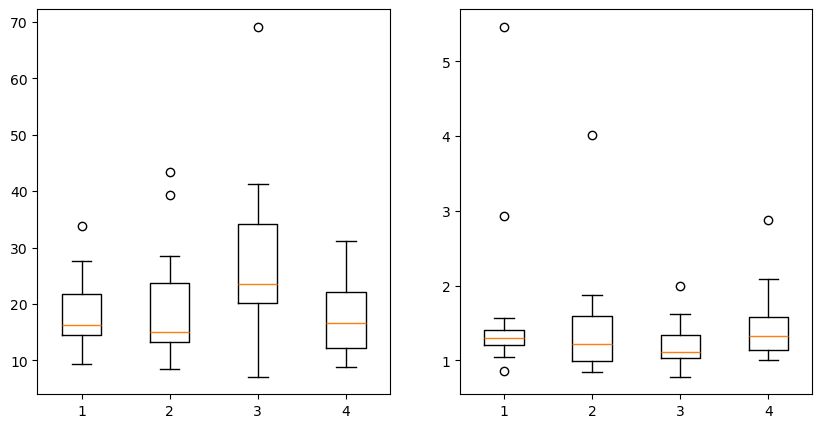

In [92]:
df_NR = df.query("dietgroup == 'NR'")
df_PR = df.query("dietgroup == 'PR'")

import matplotlib.pyplot as plt

f, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].boxplot([df_NR.cas_alpha, df_NR.malt_alpha, df_PR.cas_alpha, df_PR.malt_alpha])
ax[1].boxplot([df_NR.cas_beta, df_NR.malt_beta, df_PR.cas_beta, df_PR.malt_beta])

In [84]:
[df_NR.cas_alpha, df_NR.malt_alpha, df_PR.cas_alpha, df_PR.malt_alpha]

[112    0.049267
 113    0.016440
 114    0.032753
 115    0.070324
 122    0.034388
 123    0.027556
 126    0.028788
 127    0.020939
 211    0.015000
 212    0.027497
 216    0.076792
 219    0.048464
 220    0.070423
 Name: cas_alpha, dtype: float64,
 112    0.031854
 113    0.018723
 114    0.102713
 115    0.073647
 122    0.098617
 123    0.010206
 126    0.016378
 127    0.055915
 211    0.019240
 212    0.072470
 216    0.079992
 219    0.055490
 220    0.081134
 Name: malt_alpha, dtype: float64,
 116    0.089435
 117    0.028024
 118    0.008063
 120    0.011692
 124    0.011765
 125    0.111602
 213    0.074411
 214    0.059635
 217    0.088954
 218    0.026397
 221    0.105596
 222    0.040986
 Name: cas_alpha, dtype: float64,
 116    0.080045
 117    0.126773
 118    0.173542
 120    0.012493
 124    0.055171
 125    0.076187
 213    0.087617
 214    0.097186
 217    0.101840
 218    0.041787
 221    0.113056
 222    0.141700
 Name: malt_alpha, dtype: float64]

In [93]:
[df_NR.cas_beta, df_NR.malt_beta, df_PR.cas_beta, df_PR.malt_beta]

[48     1.303543
 49     1.272548
 50     0.865126
 58     1.116740
 59     1.044153
 62     1.410220
 63     1.563384
 164    1.401558
 165    1.212710
 168    1.344238
 169    2.927985
 172    1.239519
 173    5.461659
 Name: cas_beta, dtype: float64,
 48     0.988714
 49     1.648123
 50     1.236028
 58     1.199659
 59     4.009021
 62     0.957679
 63     0.889117
 164    1.199565
 165    1.393679
 168    0.848253
 169    1.872951
 172    1.224107
 173    1.593447
 Name: malt_beta, dtype: float64,
 52     1.996885
 53     1.129964
 54     1.029643
 55     1.229346
 56     1.038534
 57     1.017264
 60     1.618896
 166    0.781883
 167    1.087349
 171    1.086180
 174    1.305542
 175    1.437934
 Name: cas_beta, dtype: float64,
 52     2.882816
 53     1.360178
 54     1.097291
 55     2.084984
 56     1.009288
 57     1.144519
 60     1.289362
 166    1.504562
 167    1.576352
 171    1.290985
 174    1.593093
 175    1.112611
 Name: malt_beta, dtype: float64]